In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy import distance

Generally, numerical features contain the same information when their values are very close and do not require special processing. For example, if we want to use a person's height to predict something about him, it is not important whether he is 1.8m or 1.799m tall. For both heights, in most cases, we expect our model to treat them equally.

However, if we want to know whether two locations, one with coordinates (32.988, 55.291) and the other (32.987, 55.294), refer to the same point of interest on a map, this small difference is relevant. Although apparently small, this difference in the third decimal corresponds to 300m of distance, enough to determine that probably two locations do not refer to the same point of interest.

In [2]:
distance.distance((32.988, 55.291), (32.987, 55.294)).km

0.30153514629980793

Therefore, these high-precision features, where several of their decimal numbers are relevant, require special treatment for some types of ML models. For example, a linear regression or a neural network will not be able to correctly model this type of features.

To facilitate its use by this kind of models, it is necessary to apply some kind of preprocessing. The one proposed in this notebook is based on positional encoding applied in transformers to provide positional information to the tokens. Some related resources:
* https://www.tensorflow.org/text/tutorials/transformer#positional_encoding
* https://www.youtube.com/watch?v=dichIcUZfOw&ab_channel=HeduAI

This method consists of applying sinusoidal functions to the token position at different frequencies. A similar method is used in this notebook to encode latitude and longitude.

In [3]:
def encode_high_precision(x_hp, emb_size=20, precision=1e6):
    m = np.exp(np.log(precision) / emb_size)

    angle_freq = m ** np.arange(emb_size)
    angle_freq = np.expand_dims(angle_freq, axis=0)

    x_hp = np.expand_dims(x_hp, axis=1)

    x_enc = x_hp * angle_freq
    x_enc[:, 0::2] = np.cos(x_enc[:, 0::2])
    x_enc[:, 1::2] = np.sin(x_enc[:, 1::2])

    return x_enc


def plot(latitudes_encoded, latitudes):
    plt.figure(figsize=(16, 4))
    plt.pcolormesh(latitudes_encoded, cmap="RdBu")
    plt.ylabel("latitudes")
    plt.xlabel("embedding")
    plt.colorbar()
    plt.yticks([0.5, 1.5], [latitudes[0], latitudes[1]])
    plt.xticks([], [])
    plt.show()

We can observe how in the first positions of the embedding, which are the ones that use less frequency and capture less granularity, the values are similar. As we move to the right the sensitivity to small changes increases and the embedded values are different. In this way the difference between the feature values at different scales is captured.

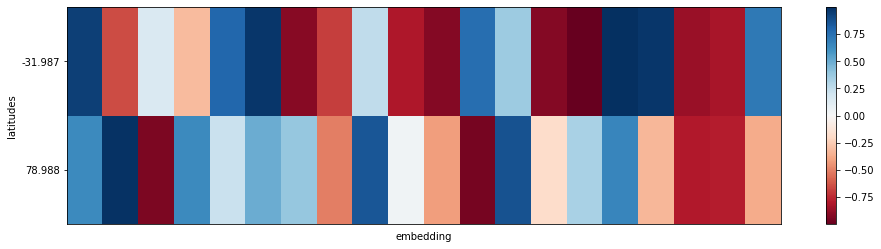

In [4]:
latitudes = [78.988, -31.987]
latitudes_scaled = np.array(latitudes) / 90  
latitudes_encoded = encode_high_precision(latitudes_scaled)

plot(latitudes_encoded, latitudes)

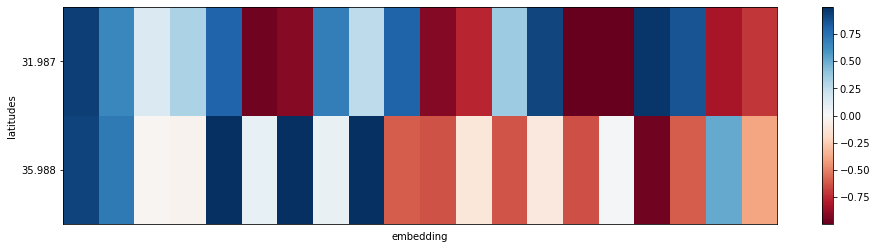

In [5]:
latitudes = [35.988, 31.987]
latitudes_scaled = np.array(latitudes) / 90  
latitudes_encoded = encode_high_precision(latitudes_scaled)

plot(latitudes_encoded, latitudes)

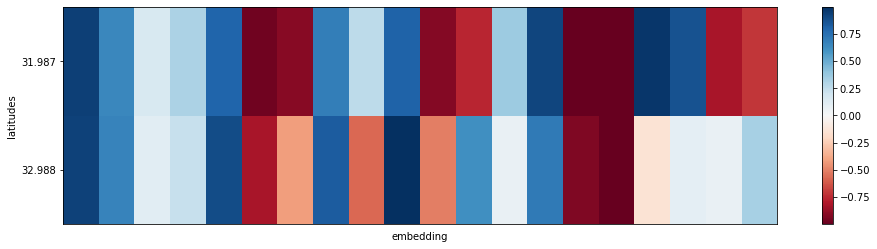

In [6]:
latitudes = [32.988, 31.987]
latitudes_scaled = np.array(latitudes) / 90  
latitudes_encoded = encode_high_precision(latitudes_scaled)

plot(latitudes_encoded, latitudes)

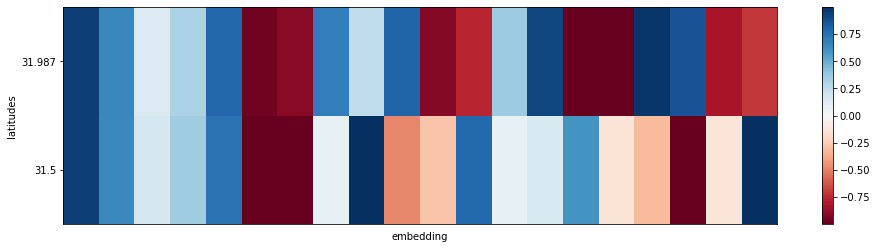

In [7]:
latitudes = [31.5, 31.987]
latitudes_scaled = np.array(latitudes) / 90  
latitudes_encoded = encode_high_precision(latitudes_scaled)

plot(latitudes_encoded, latitudes)

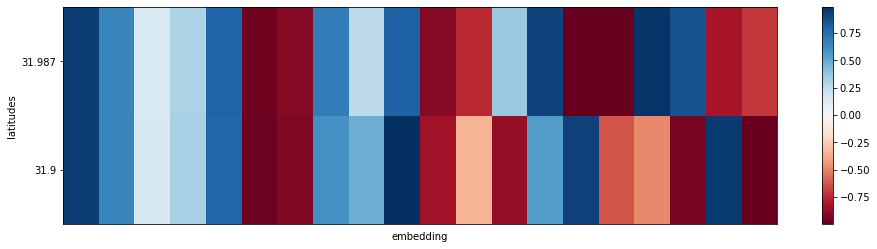

In [8]:
latitudes = [31.9, 31.987]
latitudes_scaled = np.array(latitudes) / 90  
latitudes_encoded = encode_high_precision(latitudes_scaled)

plot(latitudes_encoded, latitudes)

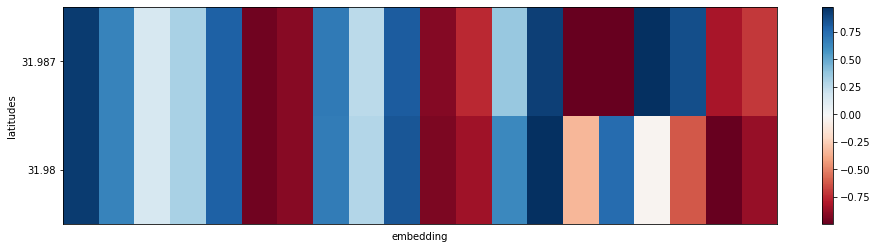

In [9]:
latitudes = [31.98, 31.987]
latitudes_scaled = np.array(latitudes) / 90  
latitudes_encoded = encode_high_precision(latitudes_scaled)

plot(latitudes_encoded, latitudes)

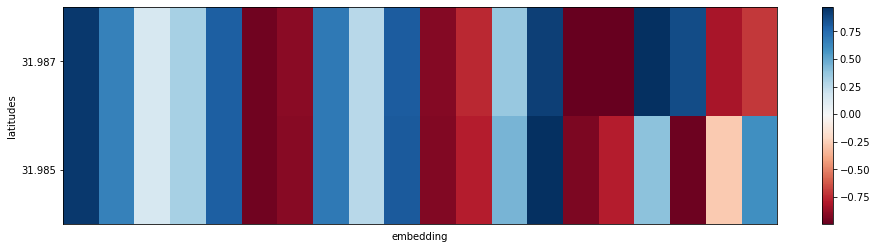

In [10]:
latitudes = [31.985, 31.987]
latitudes_scaled = np.array(latitudes) / 90  
latitudes_encoded = encode_high_precision(latitudes_scaled)

plot(latitudes_encoded, latitudes)